# <div align="center">Unsupervised Learning</div>
---------------------------------------------------------------------

you can Find me on Github:
> ###### [ GitHub](https://github.com/lev1khachatryan)

 <a id="top"></a> <br>
## Notebook  Content

- [Various Data Generation](#Data)
- [K-Means Clustering](#KMeans)
- [Hierarchical Clustering](#Hierarchical)
- [DBSCAN](#DBSCAN)

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline
# plt.style.use('seaborn-white')

from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import scale, \
                                  StandardScaler

from sklearn.cluster import KMeans, \
                            MiniBatchKMeans, \
                            AgglomerativeClustering, \
                            DBSCAN, \
                            OPTICS
from scipy.cluster.hierarchy import dendrogram, linkage

from scipy.cluster import hierarchy

from sklearn import metrics
from sklearn import datasets

import time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


import scipy.sparse as sp
from collections.abc import Iterable

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import pairwise_distances

# from yellowbrick.cluster import KElbowVisualizer

In [2]:
def WCV(X, labels, metric="euclidean"):
    """
    Compute the mean distortion of all samples.

    The within cluster variation is computed as the the sum of the squared distances between
    each observation and its closest centroid. Logically, this is the metric
    that K-Means attempts to minimize as it is fitting the model.

    Parameters
    ----------
    X : array, shape = [n_samples, n_features] or [n_samples_a, n_samples_a]
        Array of pairwise distances between samples if metric == "precomputed"
        or a feature array for computing distances against the labels.

    labels : array, shape = [n_samples]
        Predicted labels for each sample

    metric : string
        The metric to use when calculating distance between instances in a
        feature array. If metric is a string, it must be one of the options
        allowed by `sklearn.metrics.pairwise.pairwise_distances
    """
    # Encode labels to get unique centers and groups
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    unique_labels = le.classes_

    # Sum of the distortions
    distortion = 0

    # Loop through each label (center) to compute the centroid
    for current_label in unique_labels:
        # Mask the instances that belong to the current label
        mask = labels == current_label
        instances = X[mask]

        # Compute the center of these instances
        center = instances.mean(axis=0)

        if not sp.issparse(instances):
            center = np.array([center])

        # Compute the square distances from the instances to the center
        distances = pairwise_distances(instances, center, metric=metric)
        distances = distances ** 2

        # Add the sum of square distance to the distortion
        distortion += distances.sum()

    return distortion

<a id="Data"></a> <br>

# <div align="center">Generate Data</div>
---------------------------------------------------------------------
[go to top](#top)

In [3]:
n_samples = 5000
random_state = 0
plt.figure(figsize = (15,25))

<Figure size 1080x1800 with 0 Axes>

<Figure size 1080x1800 with 0 Axes>

In [4]:
def plot_scatter_c(x, y):
    plt.figure(figsize = (10,5))
    plt.scatter(x[:,0],x[:,1], c = y)
    plt.show()

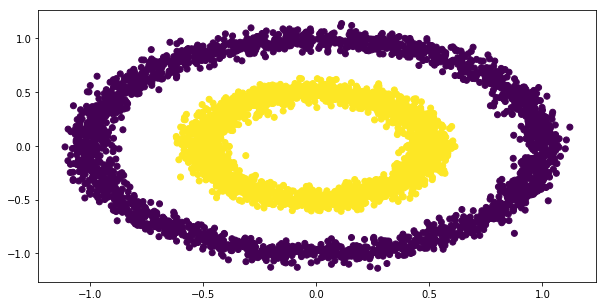

In [5]:
A, A_y = datasets.make_circles(n_samples = n_samples, factor = 0.5, noise = .05, random_state=random_state)
plot_scatter_c(A, A_y)

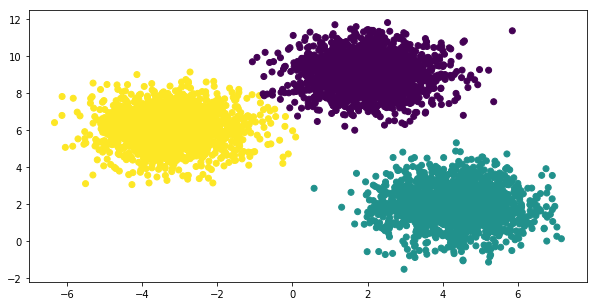

In [6]:
B, B_y = datasets.make_blobs(n_samples = n_samples, random_state = random_state, center_box = (-21,21))
plot_scatter_c(B, B_y)

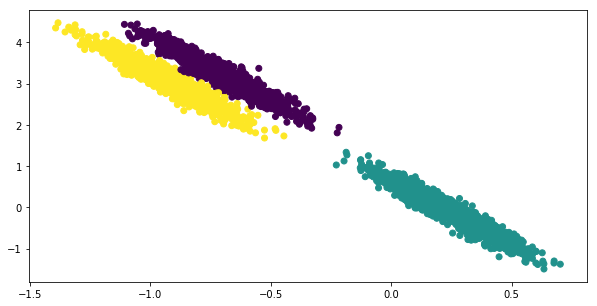

In [7]:
transformation = [[0.1, -0.2], [-0.1, 0.4]]
C = np.dot(B, transformation)

plot_scatter_c(C, B_y)

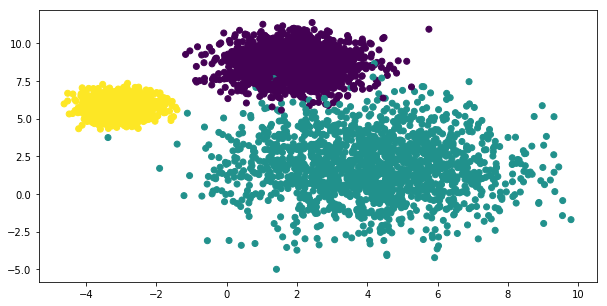

In [8]:
D, D_y = datasets.make_blobs(n_samples=n_samples, 
                                        cluster_std = [1.0, 2.0, 0.5], 
                                        random_state = random_state,
                                        center_box = (-20,20))
plot_scatter_c(D, D_y)

<a id="KMeans"></a> <br>

# <div align="center">K-Means</div>
---------------------------------------------------------------------
[go to top](#top)

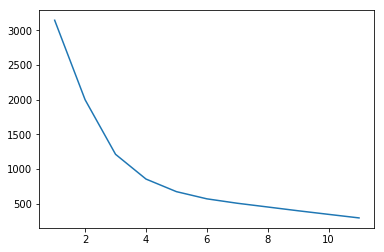

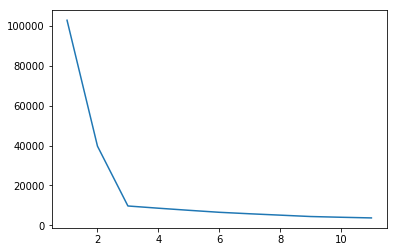

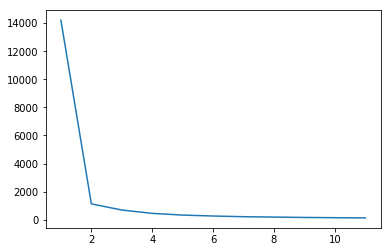

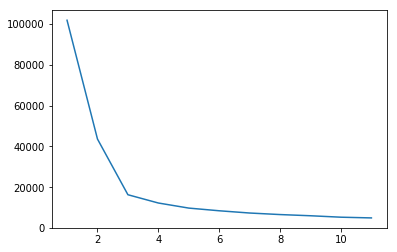

In [9]:
data = [A, B, C, D]
for j in enumerate(data):

    distortions = []
    for k in range(1, 12):
        label = KMeans(n_clusters=k, random_state=random_state).fit_predict(j[1])
        distortions.append(WCV(j[1], label))
    plt.plot(list(range(1, 12)), distortions)
    plt.show()

### From the above graph we can say that the optimal number of clusters for A, B, C and D are 4, 3, 2, 3

In [10]:
## We could gte the same result by running the following command for each dataset

# from yellowbrick.cluster import KElbowVisualizer
# model = KMeans()
# visualizer = KElbowVisualizer(
#     model, k=(1,12), metric='distortion', timings=False
# )
# visualizer.fit(A)
# visualizer.poof()

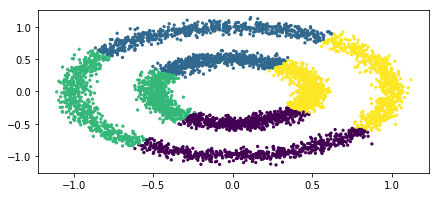

In [11]:
mod_KMeans = KMeans(n_clusters = 4)
mod_KMeans.fit(A)
plt.figure(figsize = (7,3))
plt.scatter(A[:,0], A[:,1], c = mod_KMeans.labels_, s = 5)
plt.show()

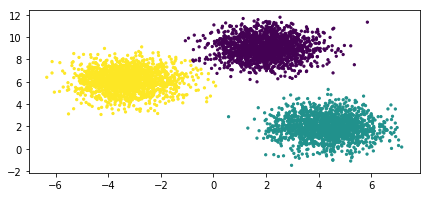

In [12]:
mod_KMeans = KMeans(n_clusters = 3)
mod_KMeans.fit(B)
plt.figure(figsize = (7,3))
plt.scatter(B[:,0], B[:,1], c = mod_KMeans.labels_, s = 5)
plt.show()

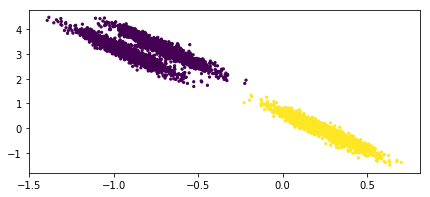

In [13]:
mod_KMeans = KMeans(n_clusters = 2)
mod_KMeans.fit(C)
plt.figure(figsize = (7,3))
plt.scatter(C[:,0], C[:,1], c = mod_KMeans.labels_, s = 5)
plt.show()

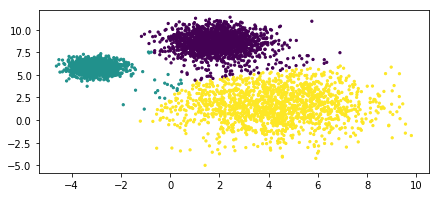

In [14]:
mod_KMeans = KMeans(n_clusters = 3)
mod_KMeans.fit(D)
plt.figure(figsize = (7,3))
plt.scatter(D[:,0], D[:,1], c = mod_KMeans.labels_, s = 5)
plt.show()

<a id="Hierarchical"></a> <br>

# <div align="center">Hierarchical Clustering</div>
---------------------------------------------------------------------
[go to top](#top)

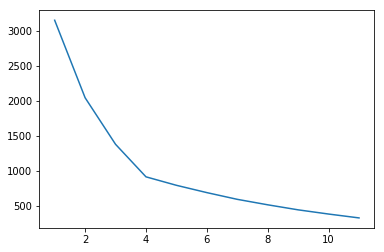

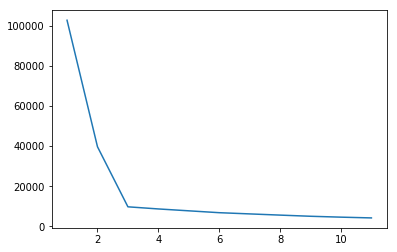

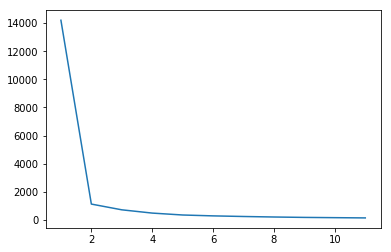

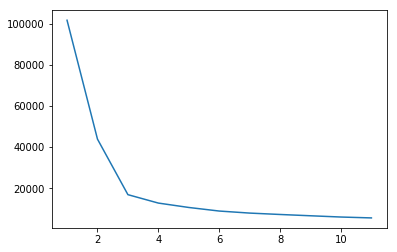

In [15]:
data = [A, B, C, D]
s = 'ward'
plot_num = 1
# plt.figure(figsize = (15,25))
for j in enumerate(data):

    distortions = []
    for k in range(1, 12):
        label = AgglomerativeClustering(n_clusters=k, linkage=s).fit_predict(j[1])
        distortions.append(WCV(j[1], label))
    plt.plot(list(range(1, 12)), distortions)
    plt.show()

### From the above graph we can say that the optimal number of clusters for A, B, C and D are 4, 3, 2, 3

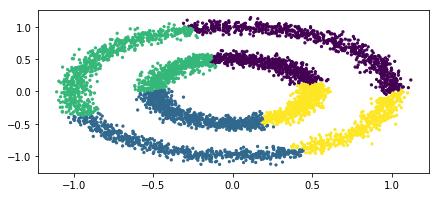

In [16]:
mod_Hie = AgglomerativeClustering(n_clusters=4, linkage=s)
mod_Hie.fit(A)
plt.figure(figsize = (7,3))
plt.scatter(A[:,0], A[:,1], c = mod_Hie.labels_, s = 5)
plt.show()

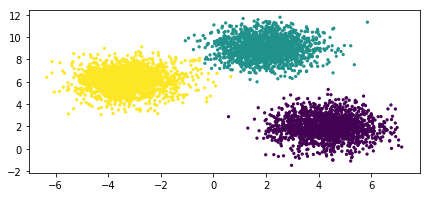

In [17]:
mod_Hie = AgglomerativeClustering(n_clusters=3, linkage=s)
mod_Hie.fit(B)
plt.figure(figsize = (7,3))
plt.scatter(B[:,0], B[:,1], c = mod_Hie.labels_, s = 5)
plt.show()

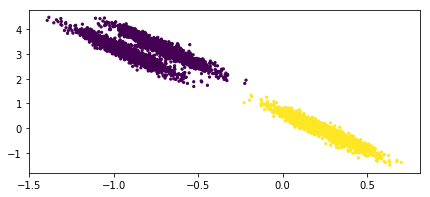

In [18]:
mod_Hie = AgglomerativeClustering(n_clusters=2, linkage=s)
mod_Hie.fit(C)
plt.figure(figsize = (7,3))
plt.scatter(C[:,0], C[:,1], c = mod_Hie.labels_, s = 5)
plt.show()

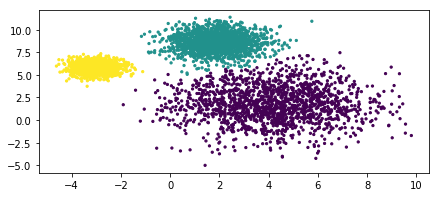

In [19]:
mod_Hie = AgglomerativeClustering(n_clusters=3, linkage=s)
mod_Hie.fit(D)
plt.figure(figsize = (7,3))
plt.scatter(D[:,0], D[:,1], c = mod_Hie.labels_, s = 5)
plt.show()

<a id="DBSCAN"></a> <br>

# <div align="center">DBSCAN</div>
---------------------------------------------------------------------
[go to top](#top)

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
dbscan = DBSCAN()

In [22]:
# dbscan = DBSCAN()

# startTime = datetime.now()

# param_grid = {
#     'eps' : [0.5, 0.8],
#     'min_samples': [25, 50]}

# CV_dt = GridSearchCV(estimator = dbscan, param_grid = param_grid, cv = 10)
# CV_dt.fit(A, A_y)

# print(CV_dt.best_params_)

# print(datetime.now() - startTime)

In [30]:
data = [A, B, C, D]
epss = [2.5, 3.5]
min_sampless = [25, 50]

for j in enumerate(data):
    distortions = []
    for eps in epss:
        for min_samples in min_sampless:
            
            label = DBSCAN(eps = eps, min_samples = min_samples).fit_predict(j[1])
            distortions.append(WCV(j[1], label))
    print(distortions)

[3147.647220013798, 3147.647220013798, 3147.647220013798, 3147.647220013798]
[102736.7984629494, 102736.7984629494, 102736.7984629494, 102736.7984629494]
[14204.382327109935, 14204.382327109935, 14204.382327109935, 14204.382327109935]
[101750.28423139604, 101750.28423139604, 101750.28423139604, 101750.28423139604]


## From the above numbers we understand that DBSCAN doesn't work for our datasets so that choose optimal hyperparameters is not possible. That's why I choose eps = 2.5 min_samples = 25 (just randomly) for all datasets

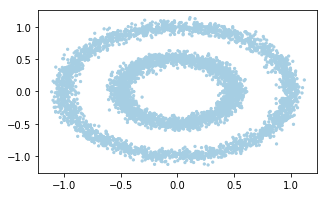

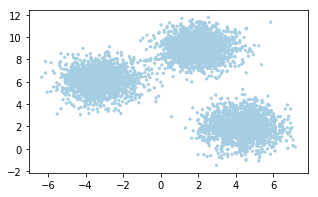

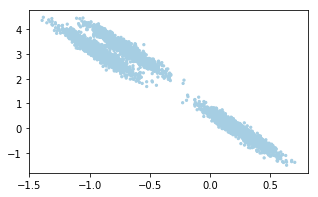

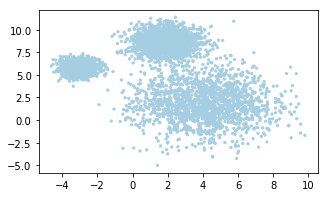

In [31]:
for j in enumerate(data):
    mod_dbscan = DBSCAN(eps = 2.5, min_samples = 25)
    mod_dbscan.fit(j[1])
    
    plt.figure(figsize = (5,3))
    plt.scatter(j[1][:,0], j[1][:,1], c = mod_dbscan.labels_,
                    s = 5, cmap = plt.cm.Paired)
    plt.show()